In [1]:
# import modules

import xarray as xr
import cmocean
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as pldates
import scipy.signal as sig
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for i in range(2):
    %matplotlib notebook

In [2]:
# select data and time

#avg='raw'
#ds = xr.open_dataset('../../../Data/Raw/Axis75_Oct1_Dec1_2013/BarkleyCanyon_BarkleyCanyonAxis_AcousticDopplerCurrentProfiler75kHz_20131010T000001Z_20131010T235958Z-binMapNearest_3beamOn.nc')
avg='15-min'
ds = xr.open_dataset('../../../Data/Raw/Axis75_Oct1_Dec1_2013/BarkleyCanyon_BarkleyCanyonAxis_AcousticDopplerCurrentProfiler75kHz_20131010T000000Z_20131011T000000Z-Ensemble900s_binMapNearest_3beamOn.nc')

#ds = ds.sel(time=slice('2013-10-10T00:00:00','2013-10-11T00:00:00'))
#ds.variables

## Velocity comparisons

<IPython.core.display.Javascript object>


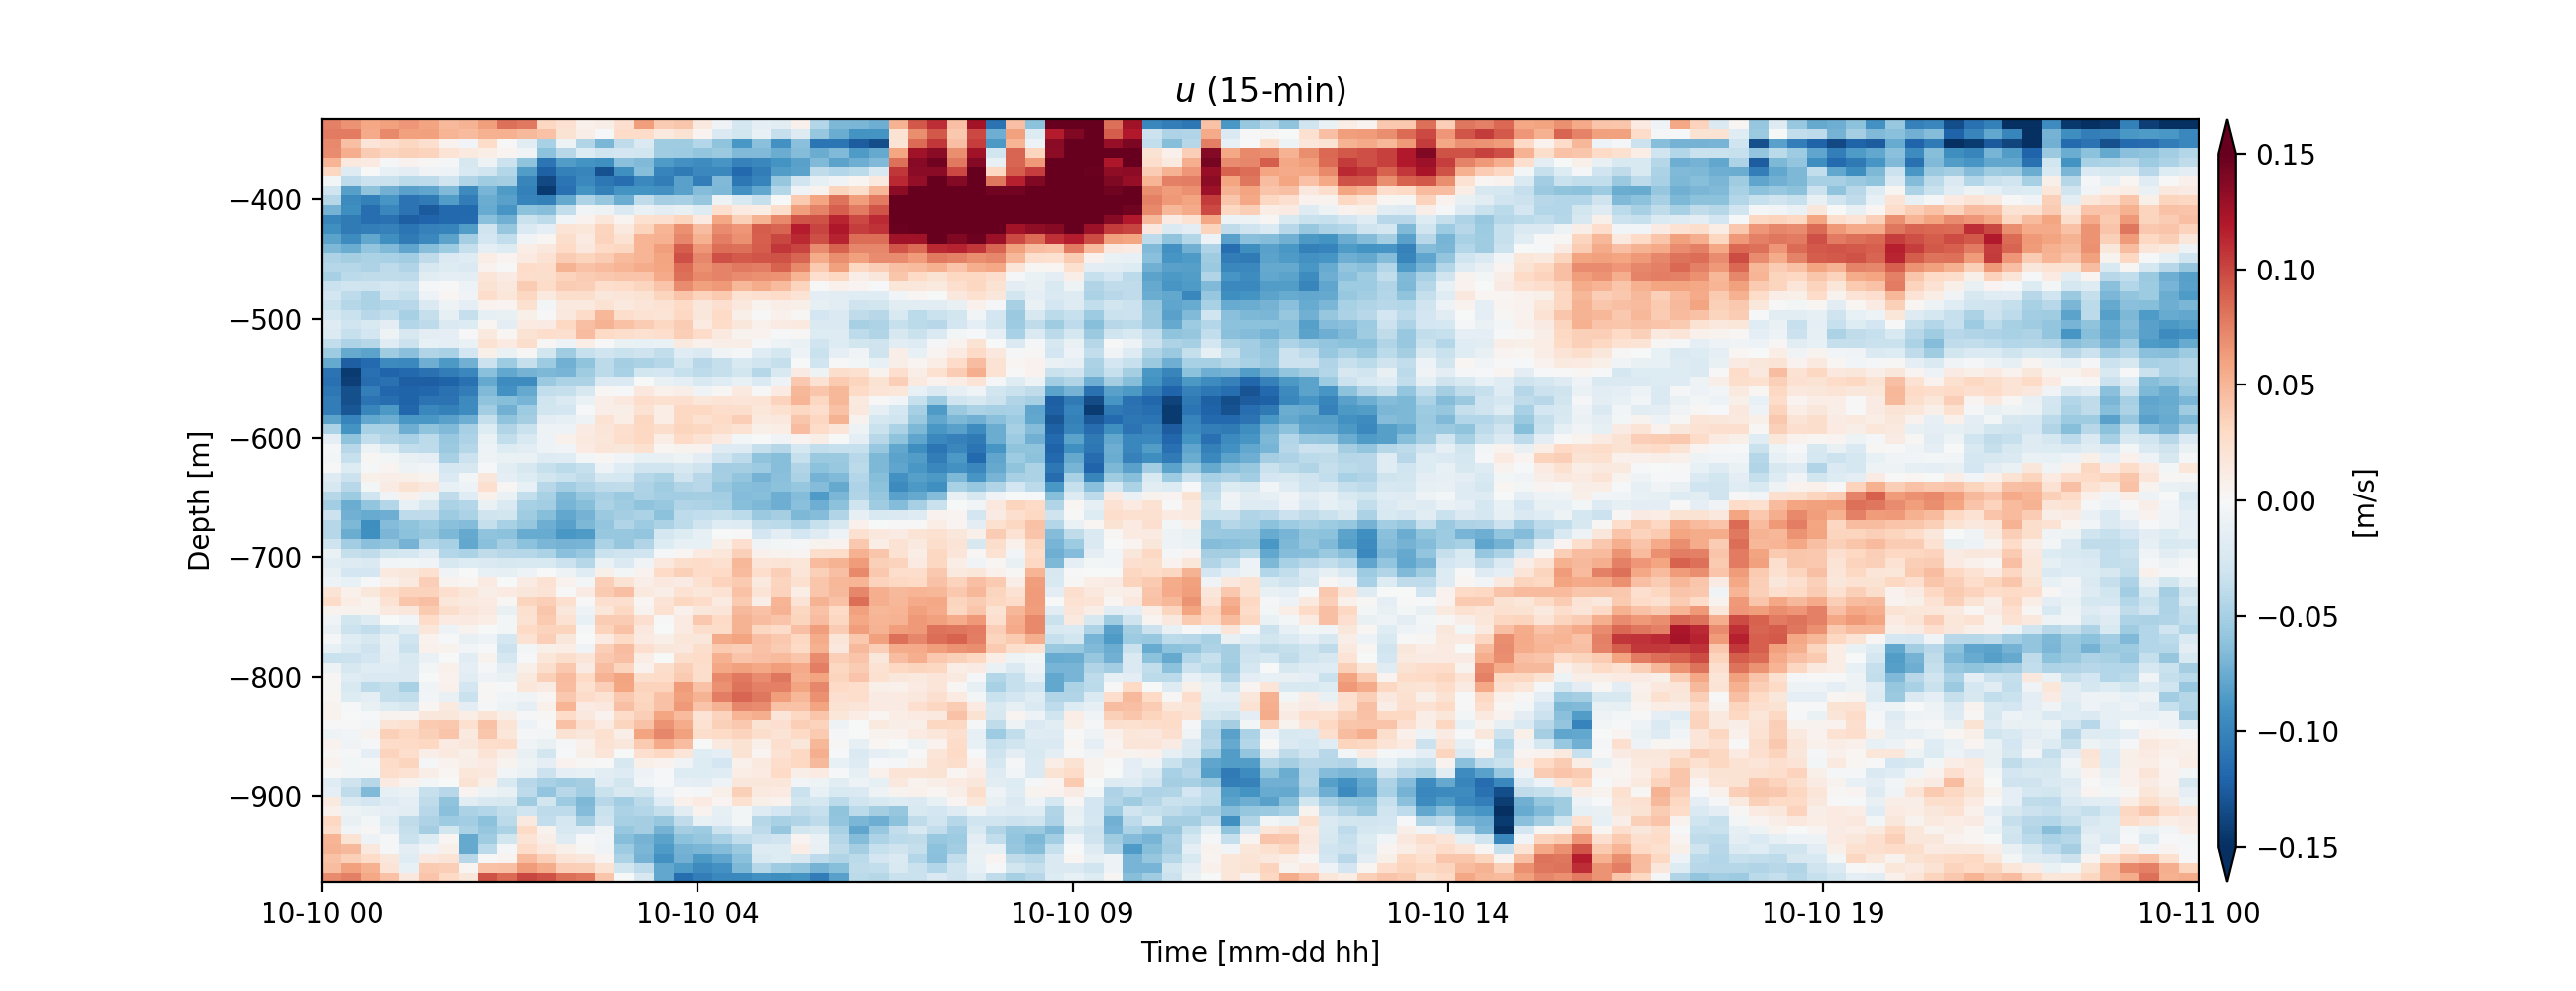

In [203]:
# plot u velocity

fig,ax0 = plt.subplots(1,1,figsize=(13,5))
vmin=-0.15
vmax=0.15
im0 = ax0.pcolormesh(ds.time, -ds.depth, ds.u.T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax,shading='auto')
cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar0.set_label('[m/s]')
ax0.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax0.set_title(rf'$u$ ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax0.xaxis.set_major_formatter(date_form)
ax0.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

In [ ]:
# coarsen raw data for 15-min comparison

dc = ds.coarsen(time=450, boundary="trim").mean()

In [ ]:
# plot coarsened u velocity

fig,ax0 = plt.subplots(1,1,figsize=(13,5))
vmin=-0.15
vmax=0.15
im0 = ax0.pcolormesh(dc.time, -dc.depth, dc.u.T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax,shading='auto')
cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar0.set_label('[m/s]')
ax0.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax0.set_title(rf'Coarsened $u$ ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax0.xaxis.set_major_formatter(date_form)
ax0.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

In [ ]:
# convolve raw data for 15-min comparison

boxcar = np.ones(450)
dcu = []
for i in range(len(ds.u.depth)):
    dcu.append( np.convolve(ds.u[:,i],boxcar,'valid') / 450 )
dcu = np.vstack(dcu)

In [ ]:
# plot convolved u velocity

fig,ax0 = plt.subplots(1,1,figsize=(13,5))
vmin=-0.15
vmax=0.15
im0 = ax0.pcolormesh(dc.time, -dc.depth, dcu[:,::450], rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax,shading='auto')
cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar0.set_label('[m/s]')
ax0.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax0.set_title(rf'Convolved $u$ ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax0.xaxis.set_major_formatter(date_form)
ax0.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

## Error thresholds

In [ ]:
# plot mean backscatter

fig,ax0 = plt.subplots(1,1,figsize=(13,5))
vmin=85
vmax=105
im0 = ax0.pcolormesh(ds.time, -ds.depth, ds.meanBackscatter.T, rasterized=True, cmap='plasma_r', vmin=vmin, vmax=vmax,shading='auto')
cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar0.set_label('[counts]')
ax0.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax0.set_title(rf'Mean backscatter ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax0.xaxis.set_major_formatter(date_form)
ax0.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

In [ ]:
# plot beam intensity data

fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(13,5),sharex=True,sharey=True)
fig.subplots_adjust(wspace=0.03,hspace=0.2)
vmin=55
vmax=120
im0 = ax0.pcolormesh(ds.time, -ds.depth, ds.intens_beam1.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im1 = ax1.pcolormesh(ds.time, -ds.depth, ds.intens_beam2.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im2 = ax2.pcolormesh(ds.time, -ds.depth, ds.intens_beam3.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im3 = ax3.pcolormesh(ds.time, -ds.depth, ds.intens_beam4.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar1.set_label('[counts]')
cbar3 = fig.colorbar(im3, ax=ax3, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar3.set_label('[counts]')
ax2.set_xlabel('Time [mm-dd hh]')
ax3.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax2.set_ylabel('Depth [m]')
ax0.set_title(rf'Beam1 intensity ({avg})')
ax1.set_title(rf'Beam2 intensity ({avg})')
ax2.set_title(rf'Beam3 intensity ({avg})')
ax3.set_title(rf'Beam4 intensity ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

<IPython.core.display.Javascript object>


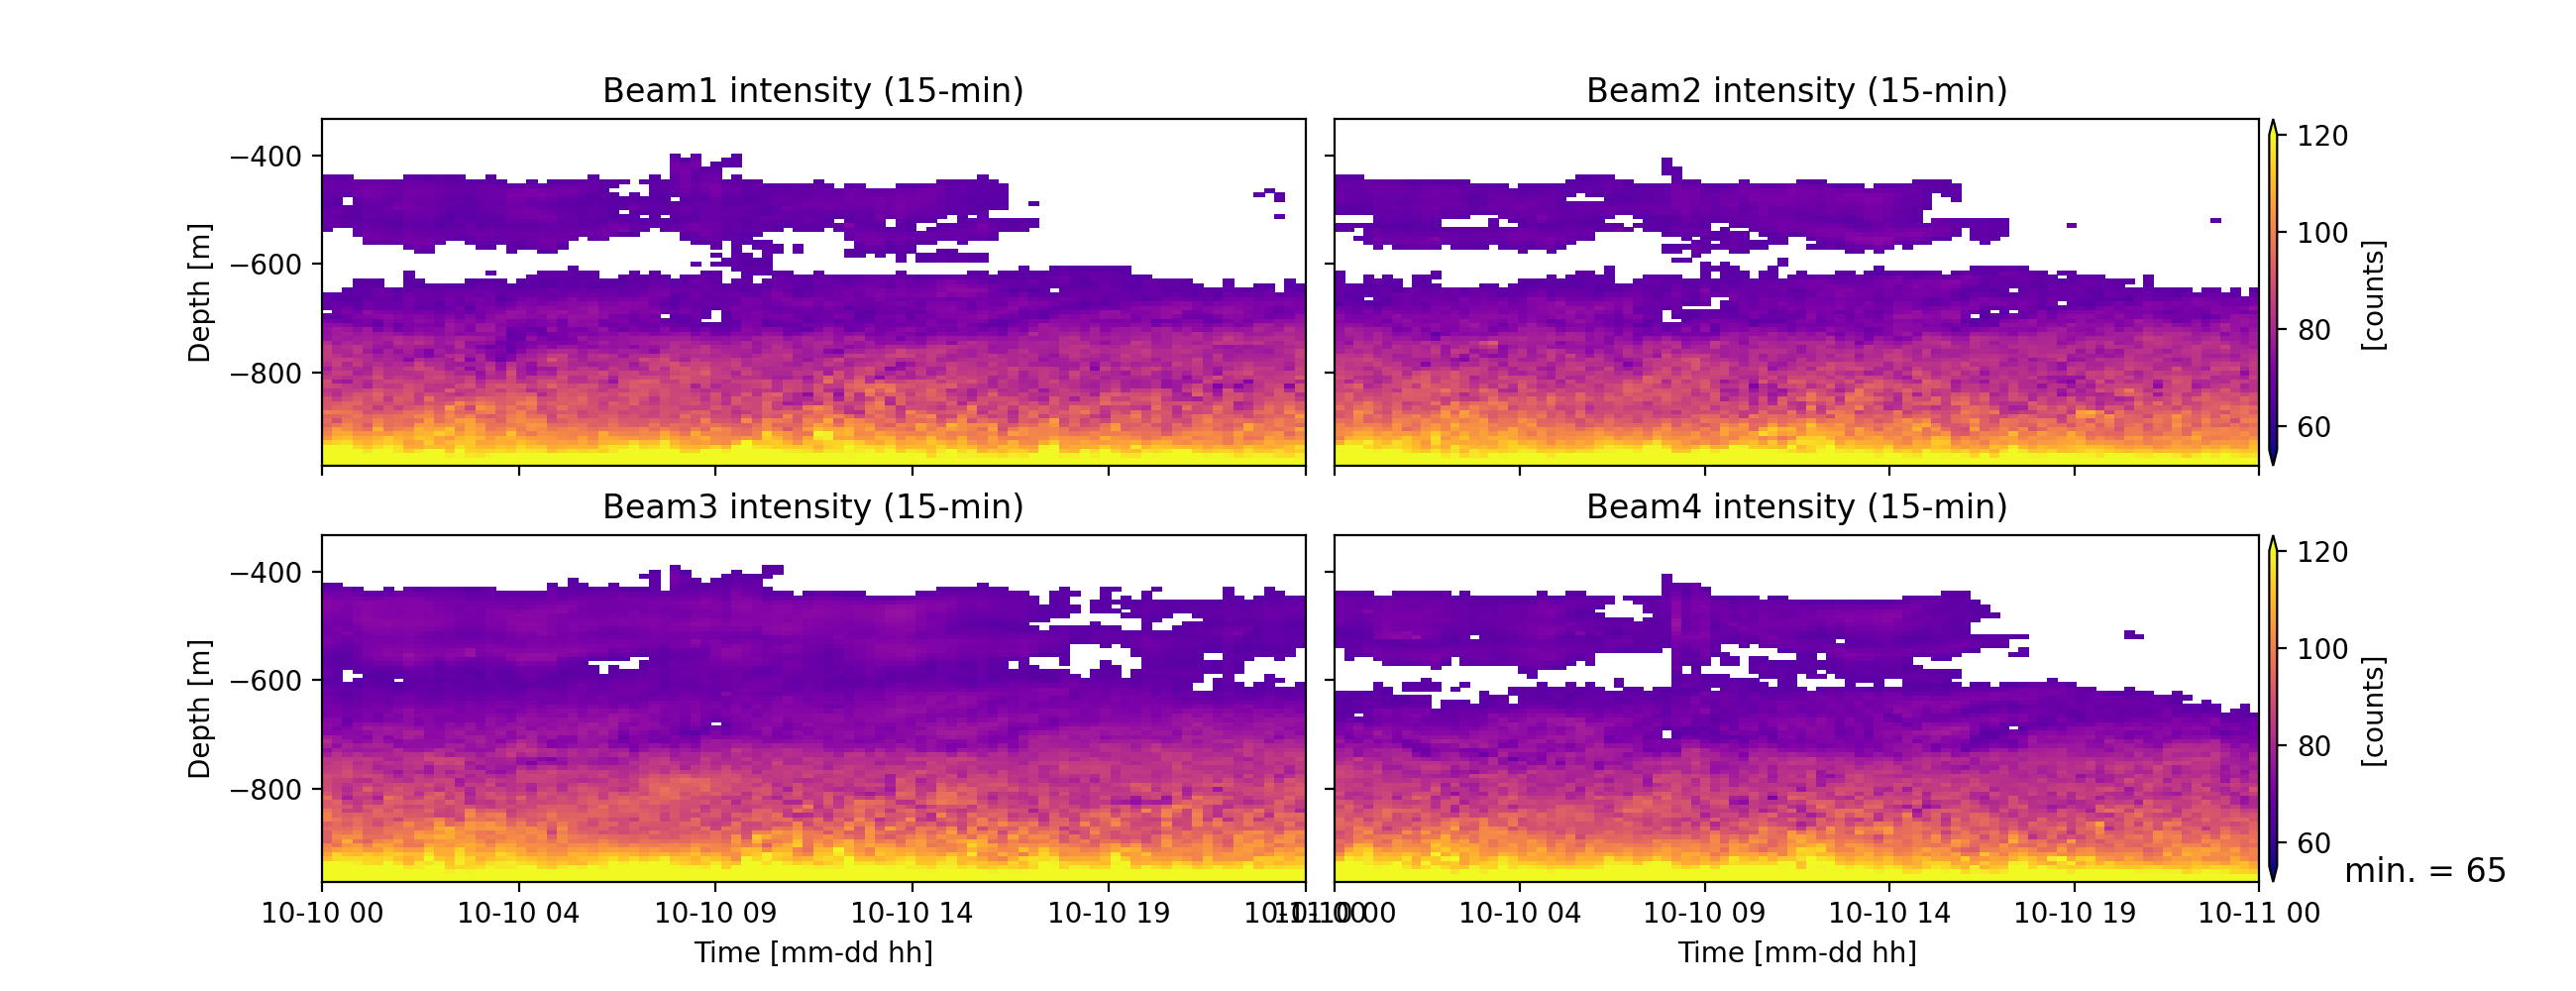

In [216]:
# plot intensity thresholds

ilevel = 65
i1 = ds.intens_beam1.where(ds.intens_beam1 > ilevel, drop=False)
i2 = ds.intens_beam2.where(ds.intens_beam2 > ilevel, drop=False)
i3 = ds.intens_beam3.where(ds.intens_beam3 > ilevel, drop=False)
i4 = ds.intens_beam4.where(ds.intens_beam4 > ilevel, drop=False)

fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(13,5),sharex=True,sharey=True)
fig.subplots_adjust(wspace=0.03,hspace=0.2)
vmin=55
vmax=120
im0 = ax0.pcolormesh(i1.time, -i1.depth, i1.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im1 = ax1.pcolormesh(i2.time, -i2.depth, i2.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im2 = ax2.pcolormesh(i3.time, -i3.depth, i3.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im3 = ax3.pcolormesh(i4.time, -i4.depth, i4.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar1.set_label('[counts]')
cbar3 = fig.colorbar(im3, ax=ax3, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar3.set_label('[counts]')
ax2.set_xlabel('Time [mm-dd hh]')
ax3.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax2.set_ylabel('Depth [m]')
ax0.set_title(rf'Beam1 intensity ({avg})')
ax1.set_title(rf'Beam2 intensity ({avg})')
ax2.set_title(rf'Beam3 intensity ({avg})')
ax3.set_title(rf'Beam4 intensity ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
fig.text(0.91,0.11,f'min. = {ilevel}',fontsize = 12)
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

<IPython.core.display.Javascript object>


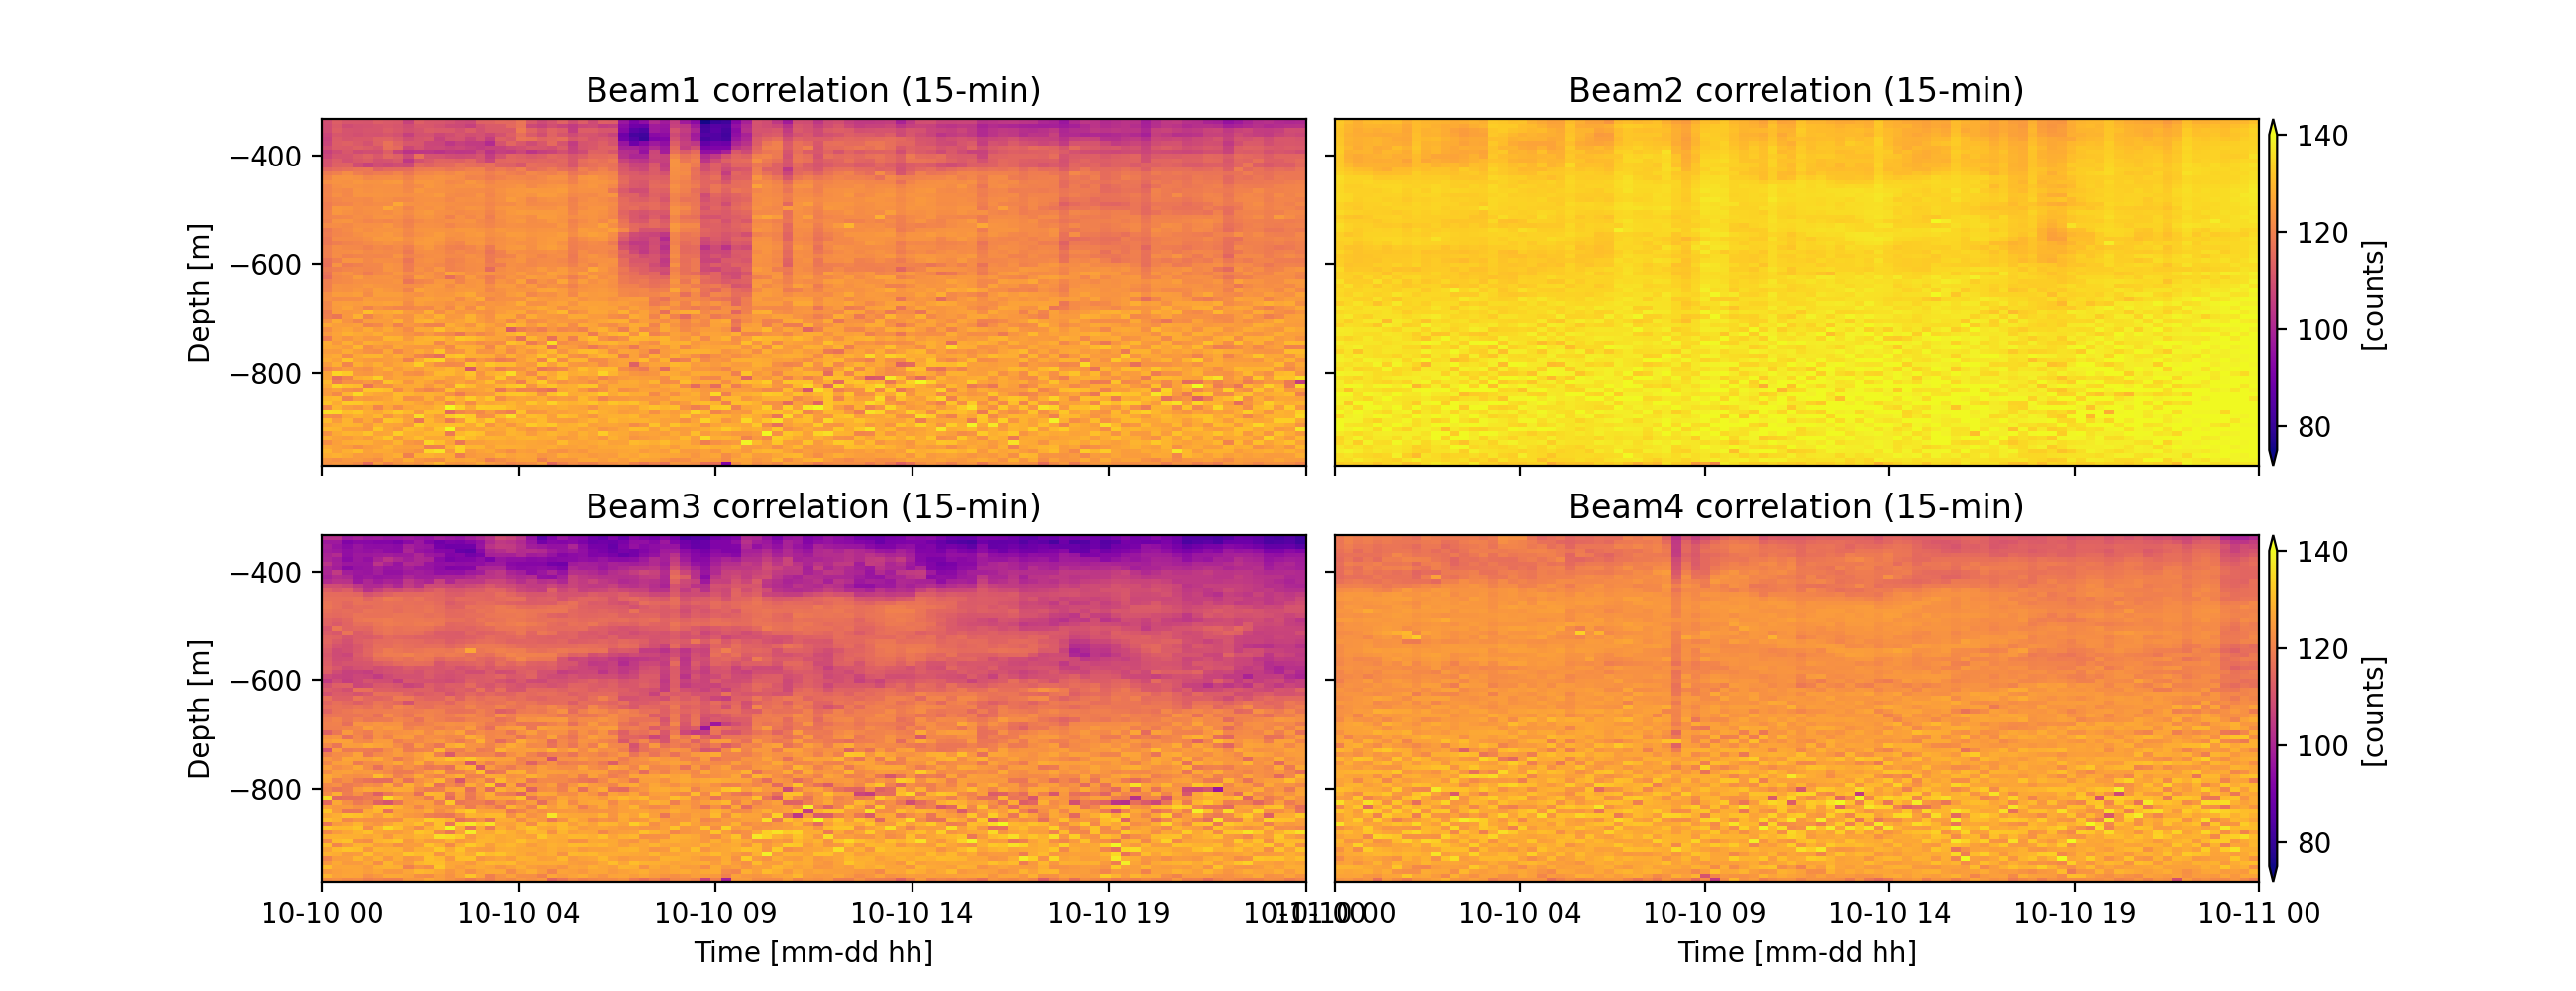

In [210]:
# plot correlation data

fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(13,5),sharex=True,sharey=True)
fig.subplots_adjust(wspace=0.03,hspace=0.2)
vmin=75
vmax=140
im0 = ax0.pcolormesh(ds.time, -ds.depth, ds.corr_beam1.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im1 = ax1.pcolormesh(ds.time, -ds.depth, ds.corr_beam2.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im2 = ax2.pcolormesh(ds.time, -ds.depth, ds.corr_beam3.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im3 = ax3.pcolormesh(ds.time, -ds.depth, ds.corr_beam4.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar1.set_label('[counts]')
cbar3 = fig.colorbar(im3, ax=ax3, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar3.set_label('[counts]')
ax2.set_xlabel('Time [mm-dd hh]')
ax3.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax2.set_ylabel('Depth [m]')
ax0.set_title(rf'Beam1 correlation ({avg})')
ax1.set_title(rf'Beam2 correlation ({avg})')
ax2.set_title(rf'Beam3 correlation ({avg})')
ax3.set_title(rf'Beam4 correlation ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

<IPython.core.display.Javascript object>


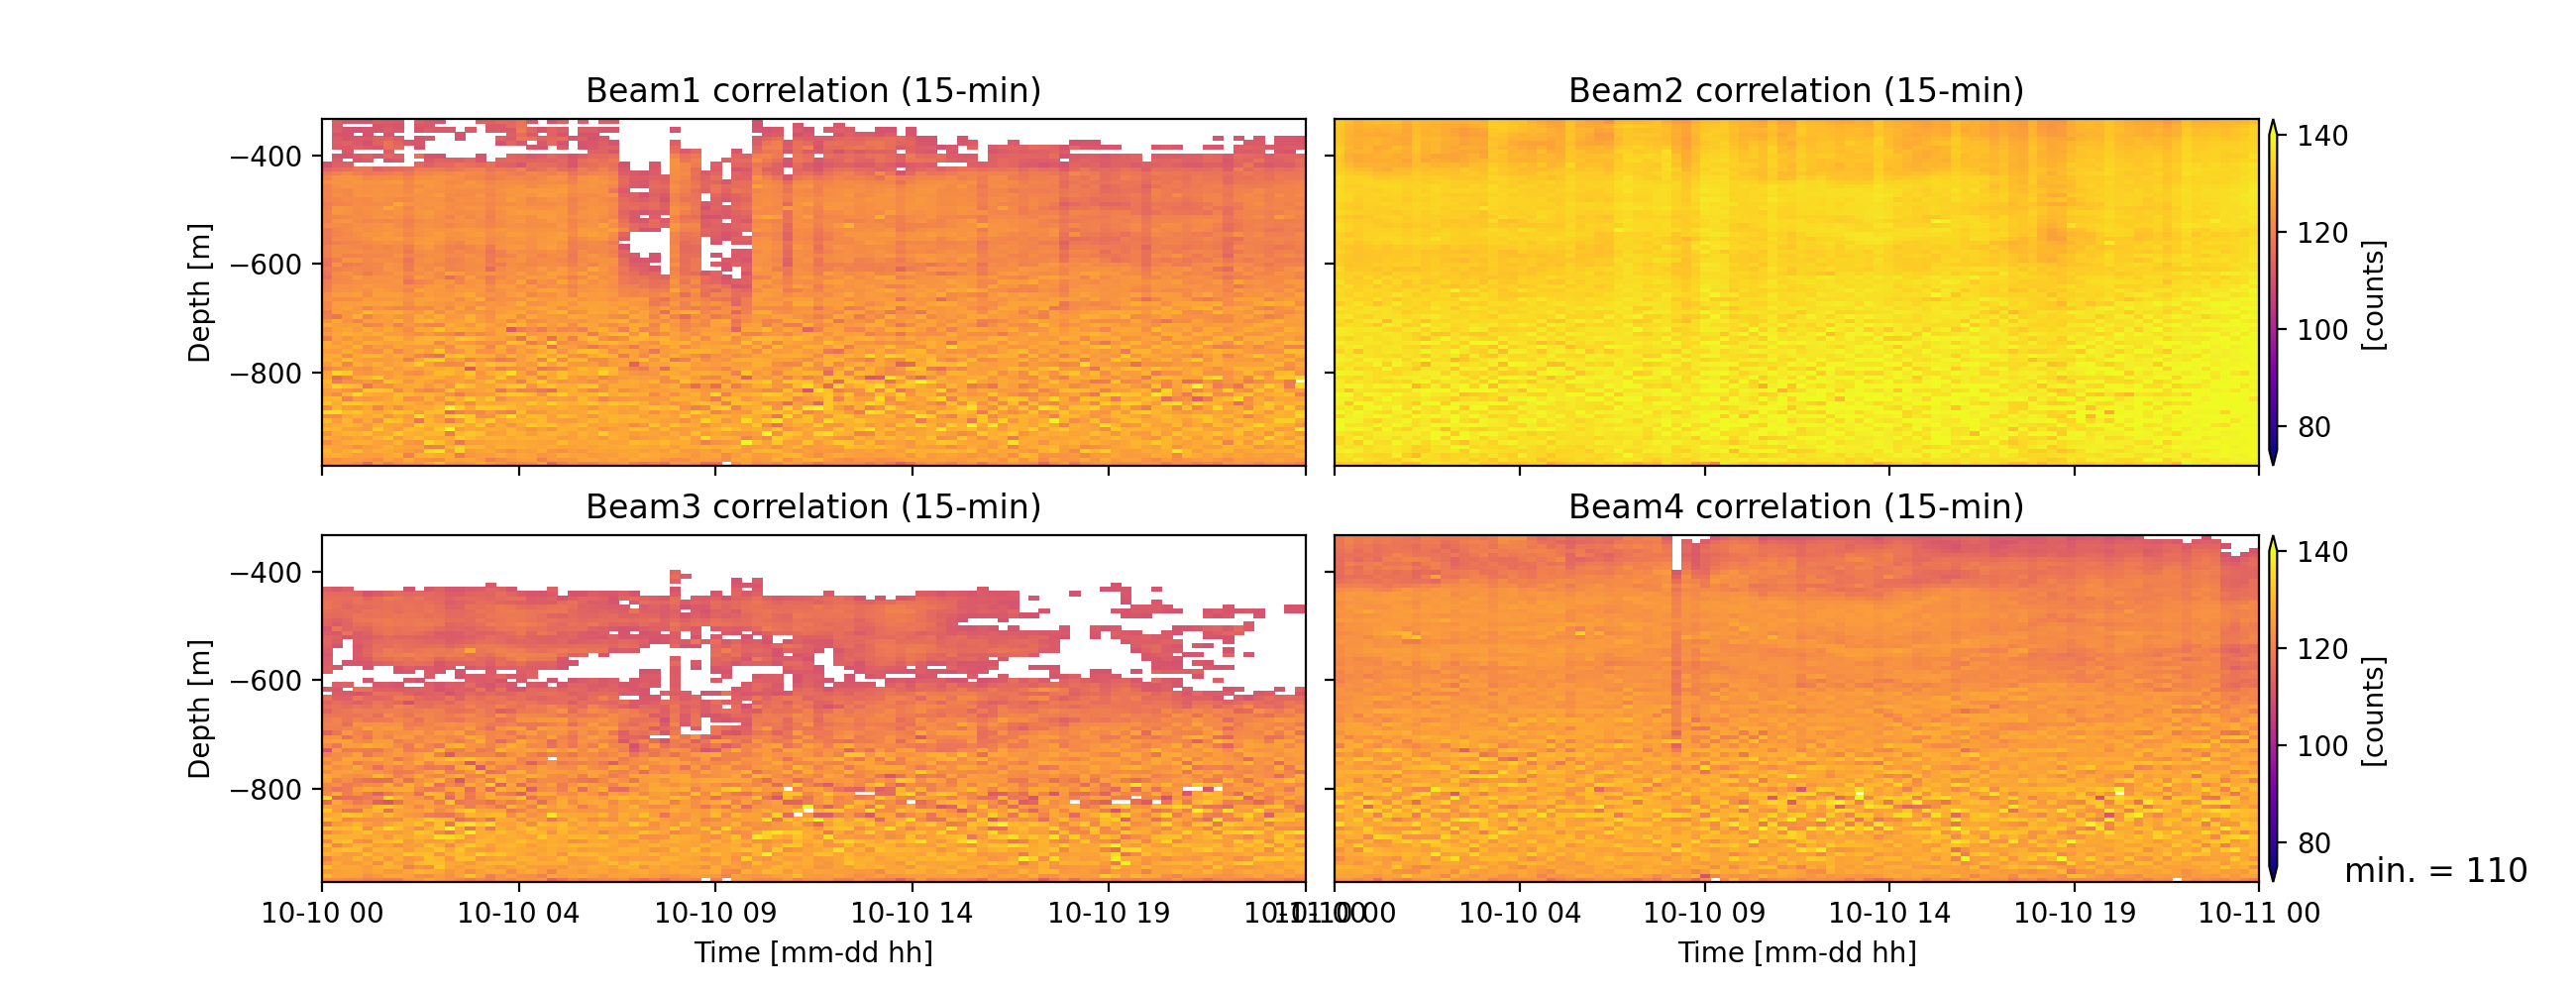

In [193]:
# plot correlation thresholds

clevel = 110
c1 = ds.corr_beam1.where(ds.corr_beam1 > clevel, drop=False)
c2 = ds.corr_beam2.where(ds.corr_beam2 > clevel, drop=False)
c3 = ds.corr_beam3.where(ds.corr_beam3 > clevel, drop=False)
c4 = ds.corr_beam4.where(ds.corr_beam4 > clevel, drop=False)

fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(13,5),sharex=True,sharey=True)
fig.subplots_adjust(wspace=0.03,hspace=0.2)
vmin=75
vmax=140
im0 = ax0.pcolormesh(c1.time, -c1.depth, c1.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im1 = ax1.pcolormesh(c2.time, -c2.depth, c2.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im2 = ax2.pcolormesh(c3.time, -c3.depth, c3.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im3 = ax3.pcolormesh(c4.time, -c4.depth, c4.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar1.set_label('[counts]')
cbar3 = fig.colorbar(im3, ax=ax3, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar3.set_label('[counts]')
ax2.set_xlabel('Time [mm-dd hh]')
ax3.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax2.set_ylabel('Depth [m]')
ax0.set_title(rf'Beam1 correlation ({avg})')
ax1.set_title(rf'Beam2 correlation ({avg})')
ax2.set_title(rf'Beam3 correlation ({avg})')
ax3.set_title(rf'Beam4 correlation ({avg})')
fig.text(0.91,0.11,f'min. = {clevel}',fontsize = 12)
date_form = pldates.DateFormatter("%m-%d %H")
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

In [217]:
# combine screens together

itest = (i1 + i2 + i3 + i4) / 4
ctest = (c1 + c2 + c3 + c4) / 4

<IPython.core.display.Javascript object>


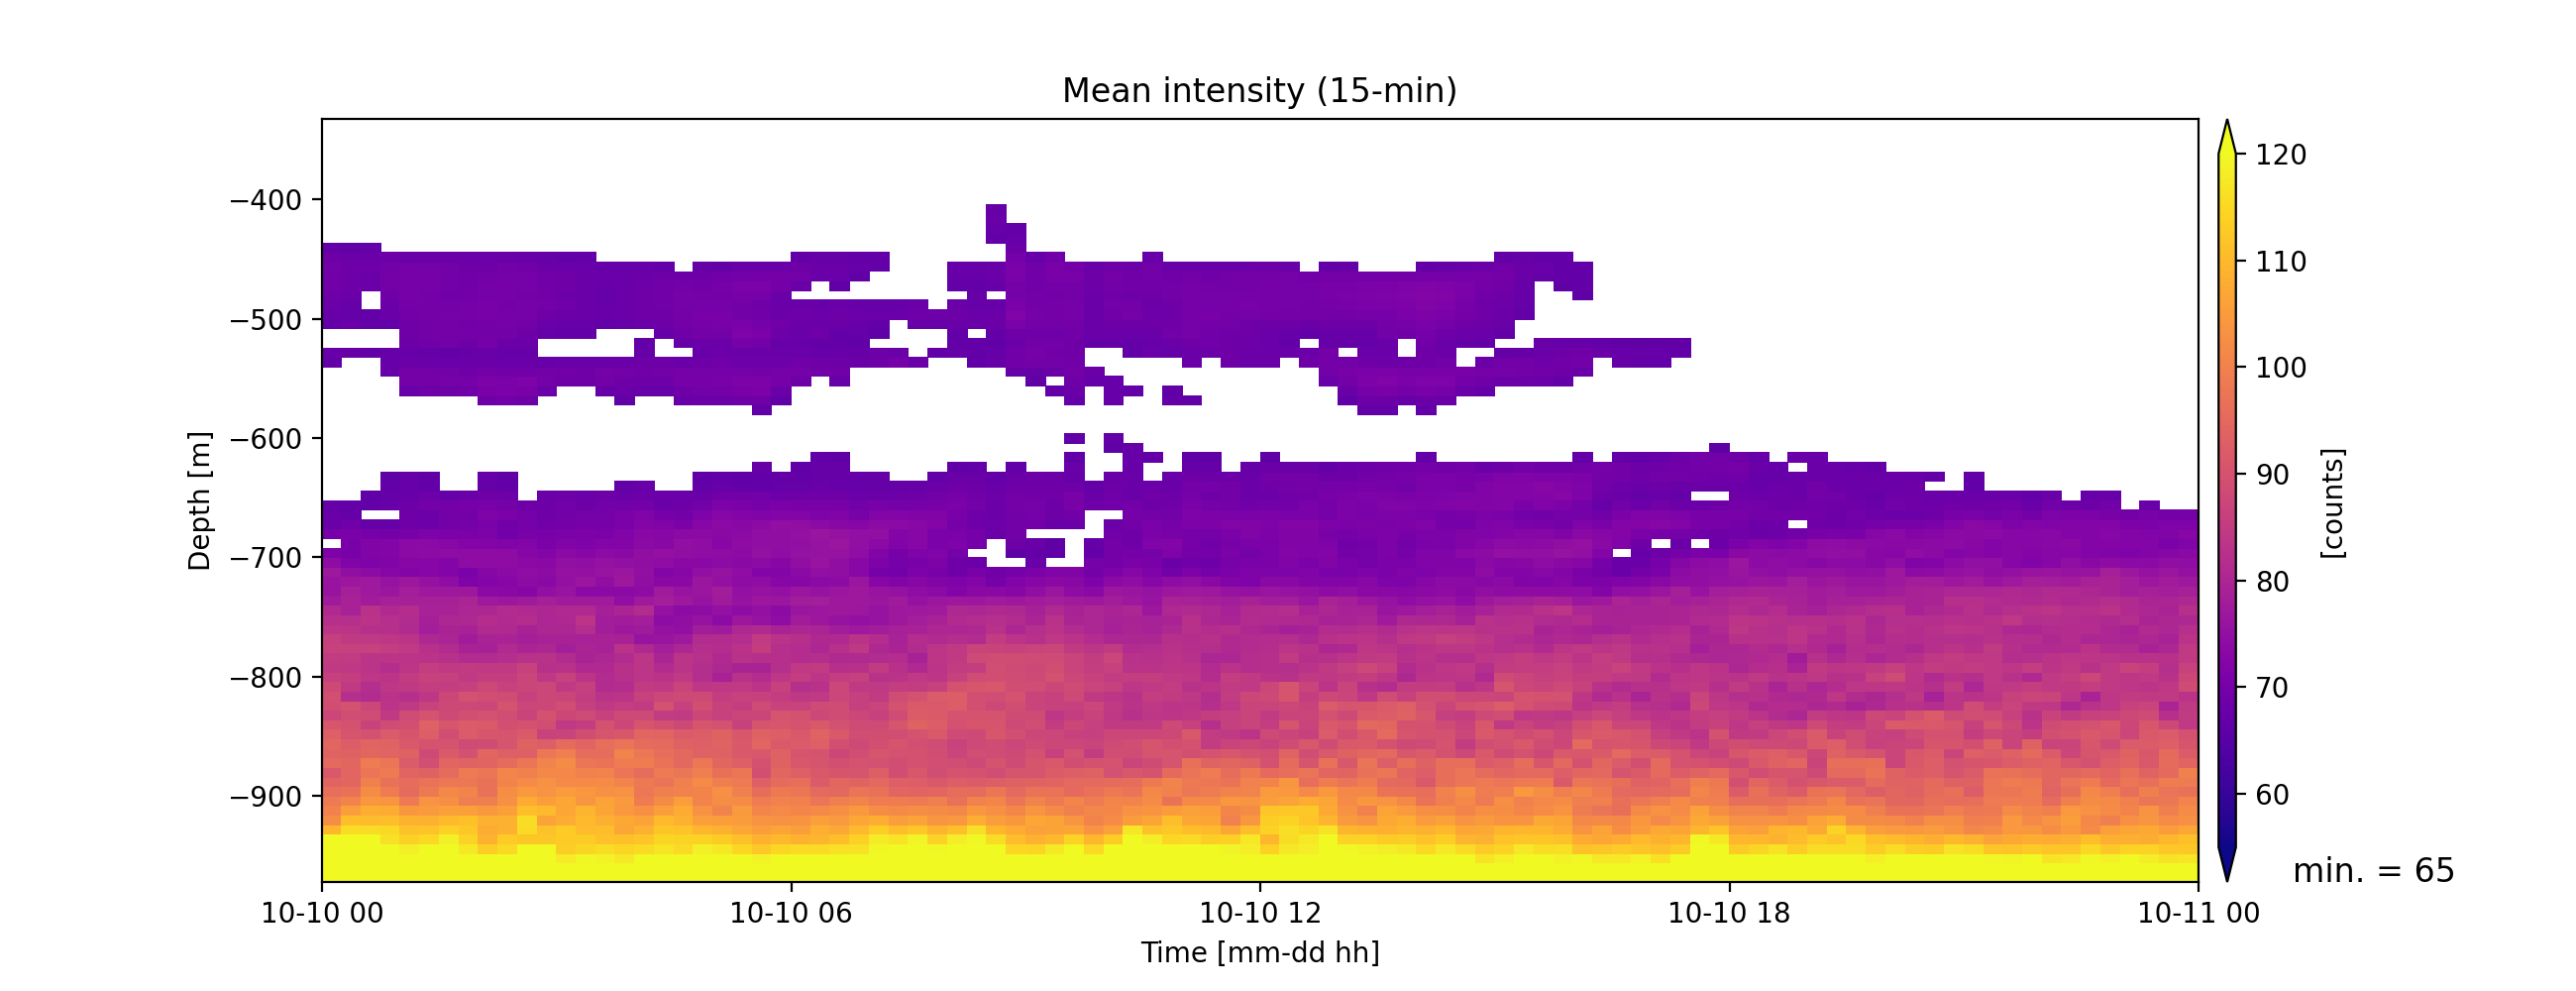

In [218]:
# plot avg intensity

fig,ax0 = plt.subplots(1,1,figsize=(13,5))
vmin=55
vmax=120
im0 = ax0.pcolormesh(itest.time, -itest.depth, itest.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar0.set_label('[counts]')
ax0.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax0.set_title(rf'Mean intensity ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax0.xaxis.set_major_formatter(date_form)
ax0.xaxis.set_major_locator(plt.MaxNLocator(4))
fig.text(0.89,0.11,f'min. = {ilevel}',fontsize = 12)
plt.show()

<IPython.core.display.Javascript object>


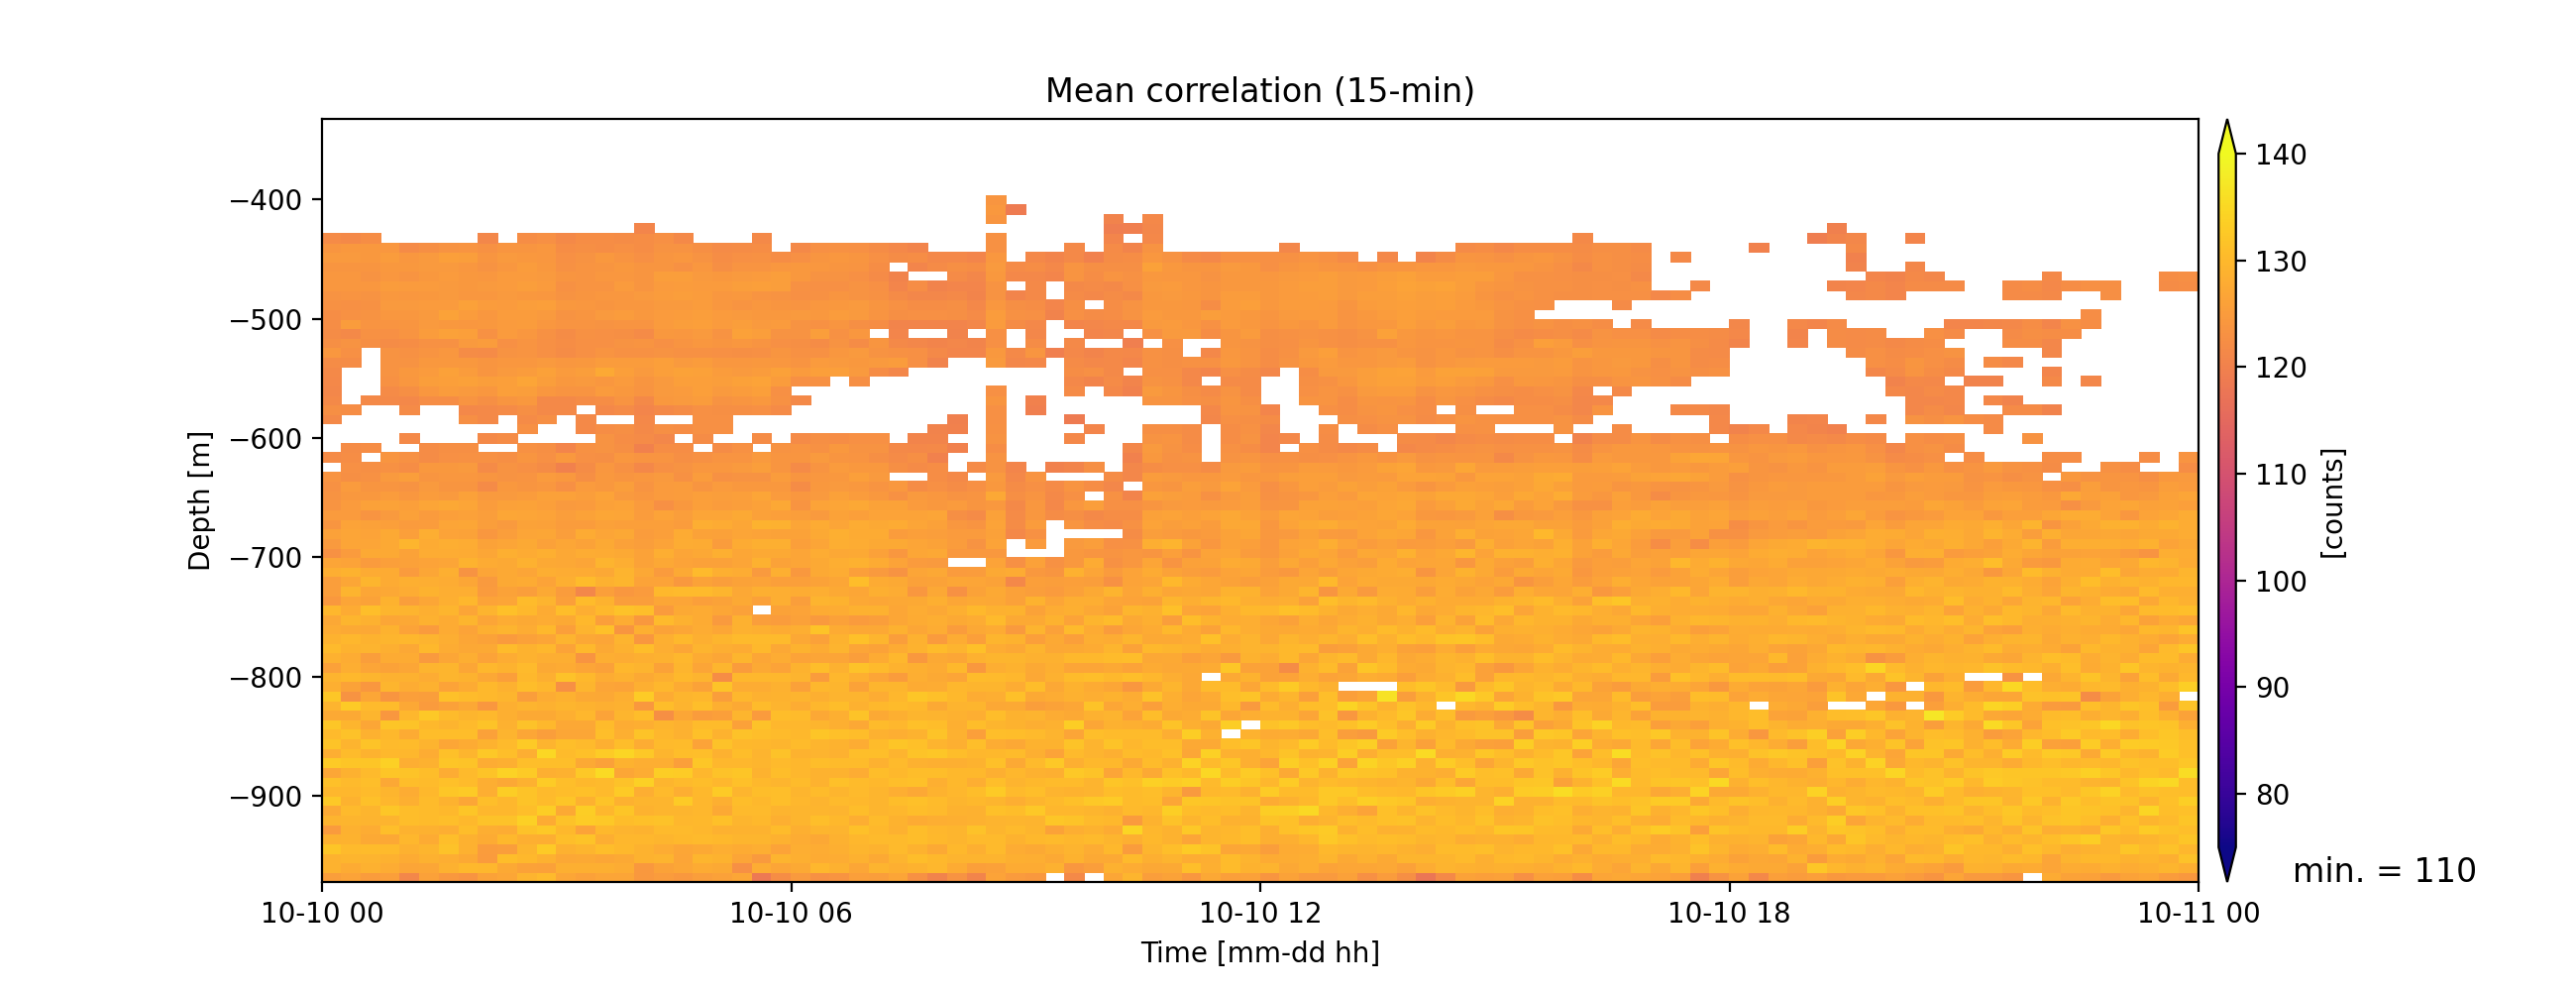

In [219]:
# plot avg correlation

fig,ax0 = plt.subplots(1,1,figsize=(13,5))
vmin=75
vmax=140
im0 = ax0.pcolormesh(ctest.time, -ctest.depth, ctest.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar0.set_label('[counts]')
ax0.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax0.set_title(rf'Mean correlation ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax0.xaxis.set_major_formatter(date_form)
ax0.xaxis.set_major_locator(plt.MaxNLocator(4))
fig.text(0.89,0.11,f'min. = {clevel}',fontsize = 12)
plt.show()

<IPython.core.display.Javascript object>


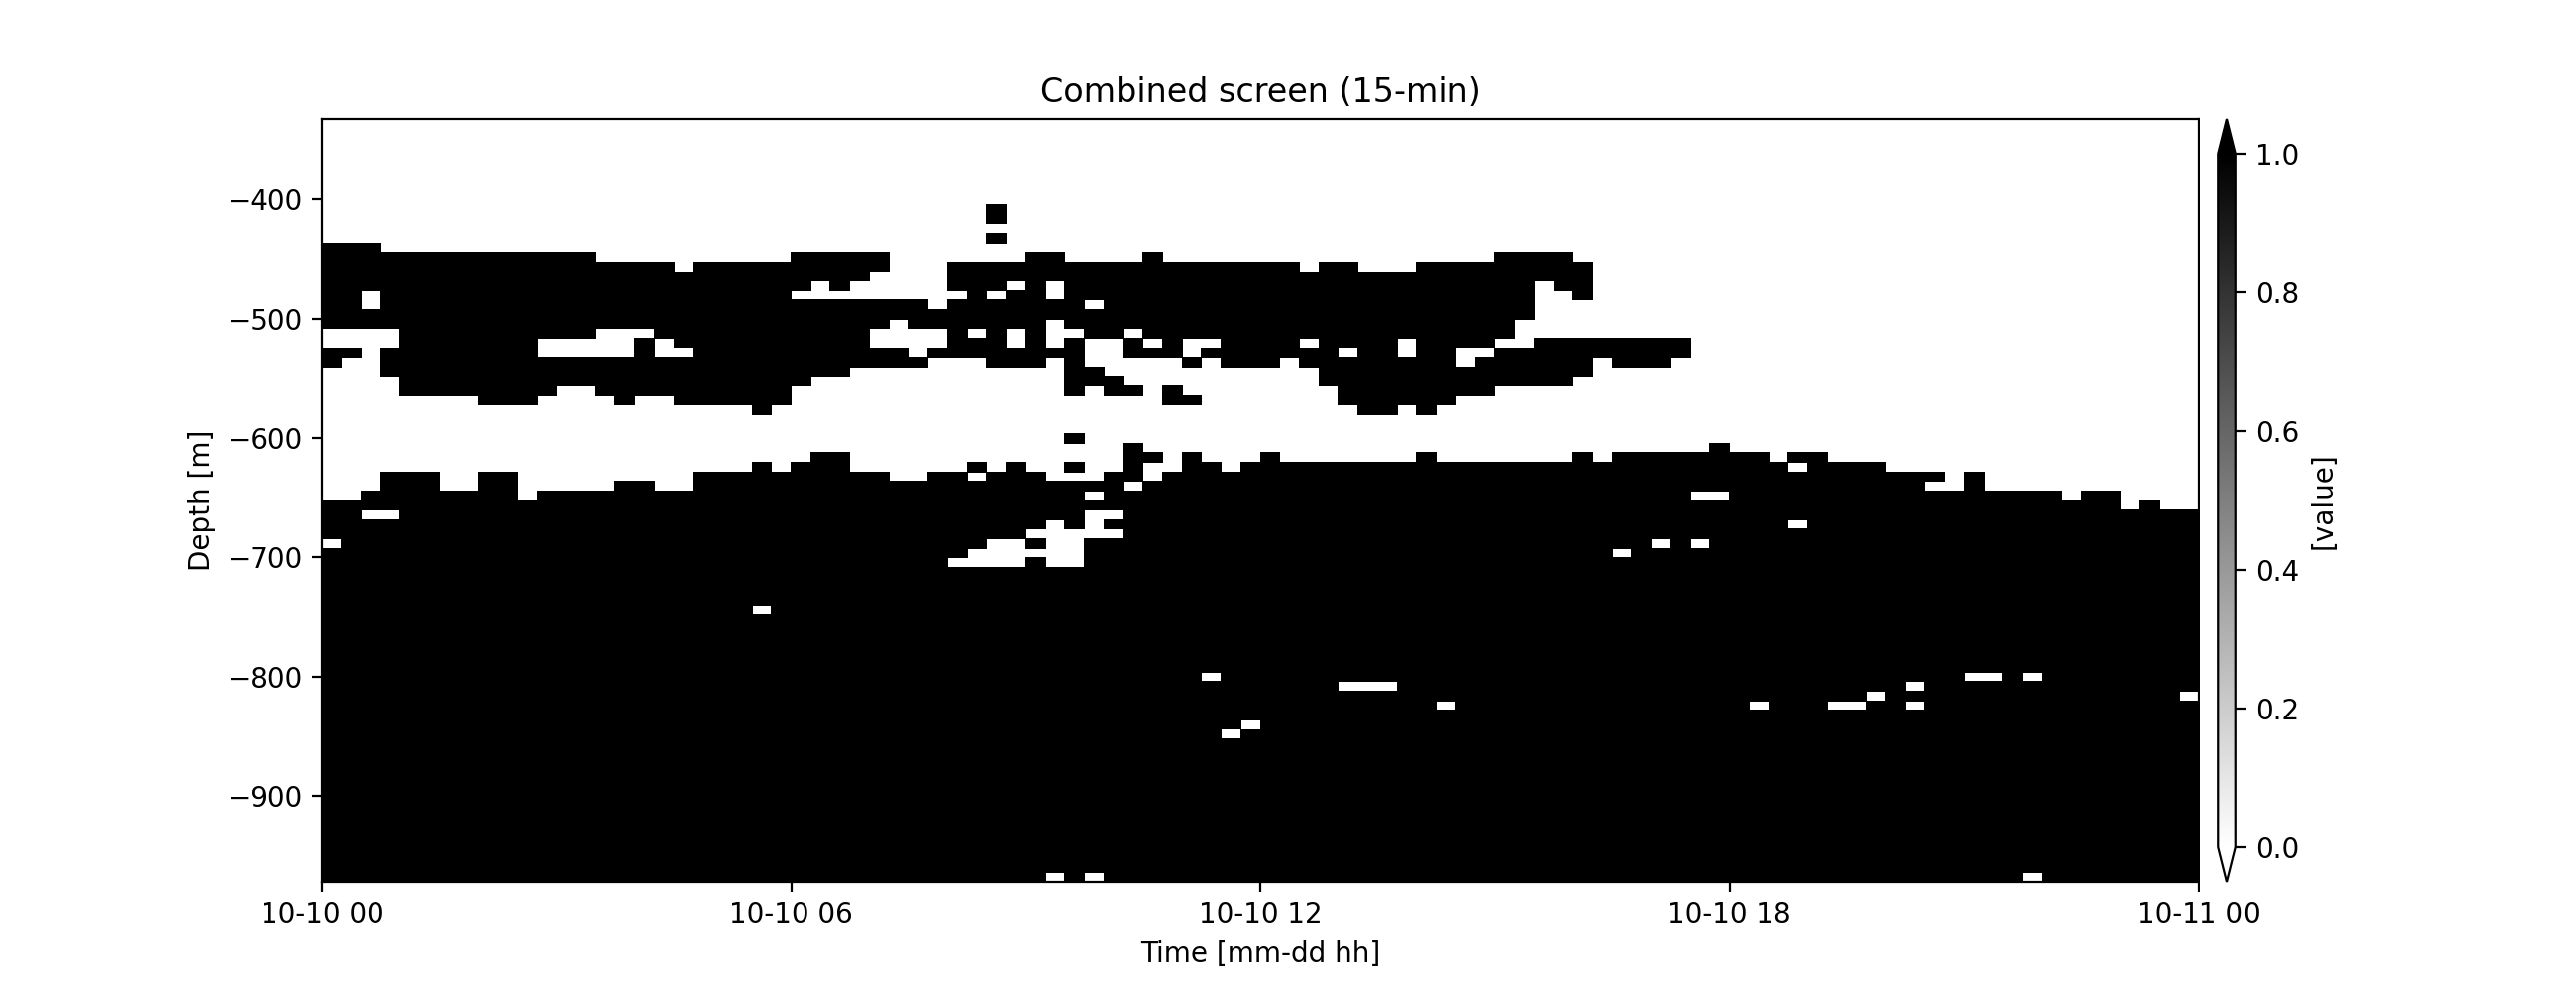

In [220]:
# plot combined screen

screen = itest + ctest
screen = screen/screen

fig,ax0 = plt.subplots(1,1,figsize=(13,5))
vmin=0
vmax=1
im0 = ax0.pcolormesh(screen.time, -screen.depth, screen.T, rasterized=True, cmap='binary', vmin=vmin, vmax=vmax,shading='auto')
cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar0.set_label('[value]')
ax0.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax0.set_title(rf'Combined screen ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax0.xaxis.set_major_formatter(date_form)
ax0.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.show()

<IPython.core.display.Javascript object>


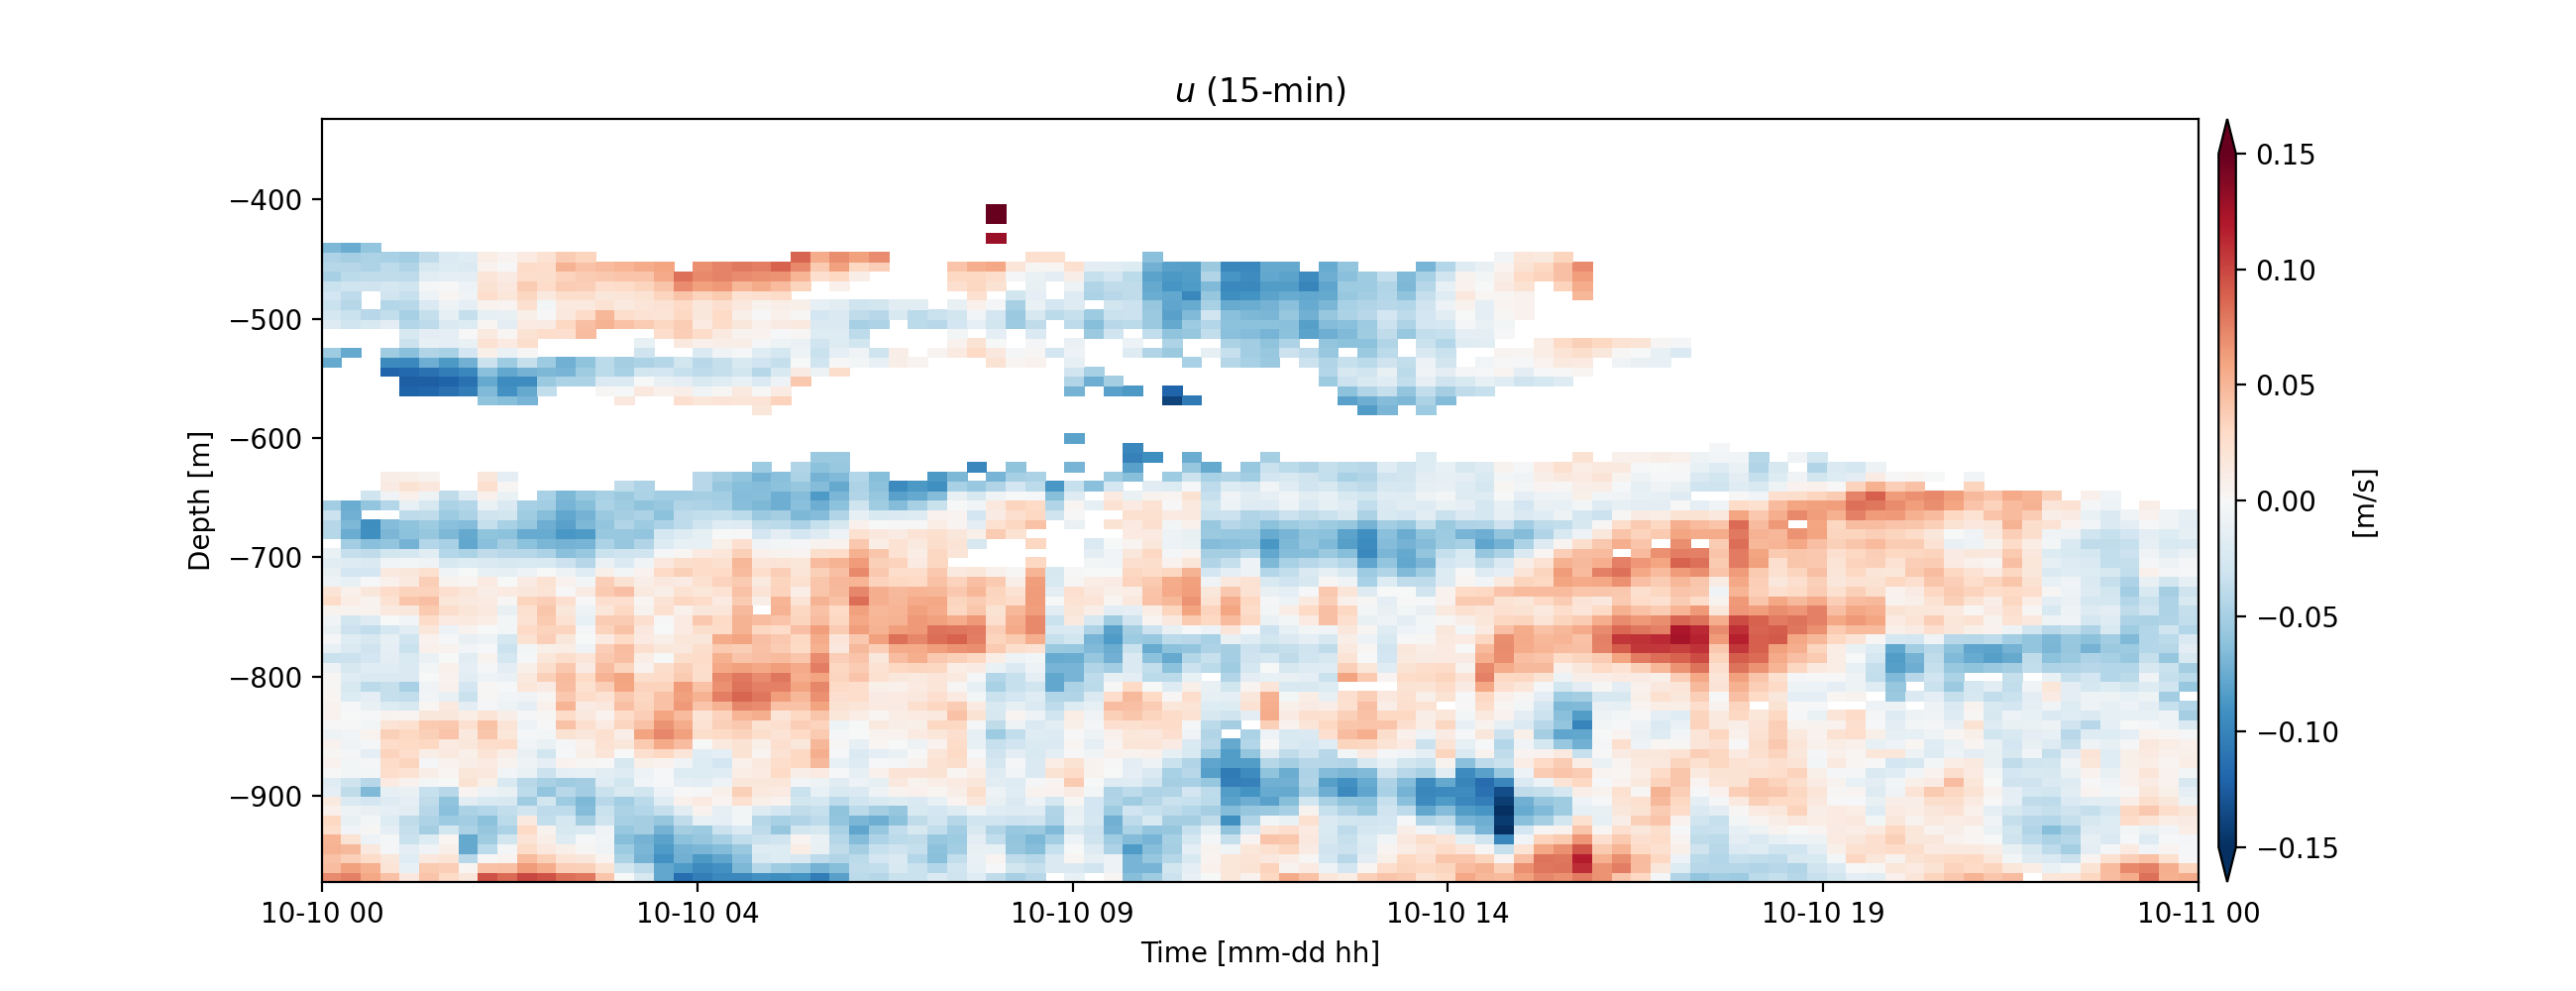

In [222]:
# plot screened u velocity

dss = ds * screen

fig,ax0 = plt.subplots(1,1,figsize=(13,5))
vmin=-0.15
vmax=0.15
im0 = ax0.pcolormesh(dss.time, -dss.depth, dss.u.T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax,shading='auto')
cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar0.set_label('[m/s]')
ax0.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax0.set_title(rf'$u$ ({avg})')
date_form = pldates.DateFormatter("%m-%d %H")
ax0.xaxis.set_major_formatter(date_form)
ax0.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

## Long-term raw and PSD comparisons

In [ ]:
# PSD of 2 months of raw data

dr = xr.open_mfdataset('../../../Data/Raw/Axis75_Oct1_Dec1_2013/raw/*.nc',join='override')

gm = np.loadtxt('../GM/gm.dat')   # get GM data from separate code
gm_freq = gm[:,0]                                # GM based on N at -904 m
gm_psd = gm[:,1]
gm_cw = gm[:,2]
gm_ccw = gm[:,3]

In [ ]:
# select depth, remove mean, drop nans

didx = 16 # 46 is -600 m
d_stamp = int(-dr.depth[didx].values)
print(d_stamp)
dru = dr.u[:,didx]
dru = dru.dropna('time')
drum = dru - dru.mean(skipna=True)

In [ ]:
# psd parameters

nps = 2**18
overlap = nps * 0.5
fs = 0.5
win = 'hanning'

drum_f, drum_Sxx = sig.welch(drum, fs=fs, window=win, \
                                                            nperseg = nps, noverlap = overlap, return_onesided=True)

In [ ]:
# plot PSD

fig,ax = plt.subplots(1,1,figsize=(8,7))
ax.loglog(drum_f,drum_Sxx)
#ax.set_xlim(3e-5,5.5e-4)
ax.set_xlim(3e-5,None)
#ax.set_ylim(1e-1,5.5e1)
ax.set_ylim(None,2e1)
ax.loglog(gm_freq/(2*np.pi),gm_psd*(np.pi),color='black',lw=1.2,ls='--', label='GM79: 1/2') # 1/2 GM for components
ax.tick_params(axis='both', direction='in', which='both', labelsize=14)
ax.set_ylabel('Power spectral density [(m/s)$^2$/Hz]',fontsize=14)
ax.set_xlabel('Frequency [Hz]',fontsize=14)
fig.text(0.44,0.89,f'{d_stamp} m - Raw',fontsize=14)

plt.show()

In [ ]:
# plot raw intensity thresholds

ilevel = 65
i1 = dr.intens_beam1.where(dr.intens_beam1 > ilevel, drop=True)
i2 = dr.intens_beam2.where(dr.intens_beam2 > ilevel, drop=True)
i3 = dr.intens_beam3.where(dr.intens_beam3 > ilevel, drop=True)
i4 = dr.intens_beam4.where(dr.intens_beam4 > ilevel, drop=True)

fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(13,5),sharex=True,sharey=True)
fig.subplots_adjust(wspace=0.03,hspace=0.2)
vmin=55
vmax=120
im0 = ax0.pcolormesh(i1.time, -i1.depth, i1.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im1 = ax1.pcolormesh(i2.time, -i2.depth, i2.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im2 = ax2.pcolormesh(i3.time, -i3.depth, i3.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
im3 = ax3.pcolormesh(i4.time, -i4.depth, i4.T, rasterized=True, cmap='plasma', vmin=vmin, vmax=vmax,shading='auto')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar1.set_label('[counts]')
cbar3 = fig.colorbar(im3, ax=ax3, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar3.set_label('[counts]')
ax2.set_xlabel('Time [mm-dd hh]')
ax3.set_xlabel('Time [mm-dd hh]')
ax0.set_ylabel('Depth [m]')
ax2.set_ylabel('Depth [m]')
ax0.set_title(rf'Beam1 intensity (raw)')
ax1.set_title(rf'Beam2 intensity (raw)')
ax2.set_title(rf'Beam3 intensity (raw)')
ax3.set_title(rf'Beam4 intensity (raw)')
date_form = pldates.DateFormatter("%m-%d %H")
fig.text(0.91,0.11,f'min. = {ilevel}',fontsize = 12)
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()